<a href="https://colab.research.google.com/github/PhillipOverloeper/BarlowTwins/blob/main/Kernel_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch.nn as nn
import torch.optim as optim
from sklearn.cluster import KMeans


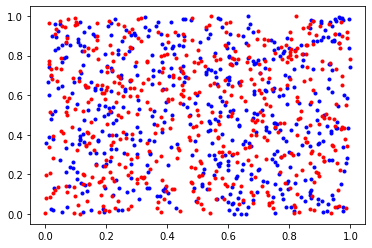

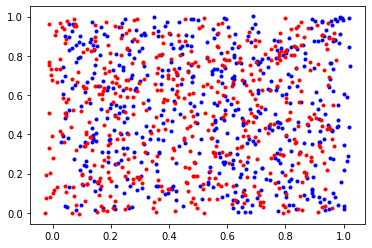

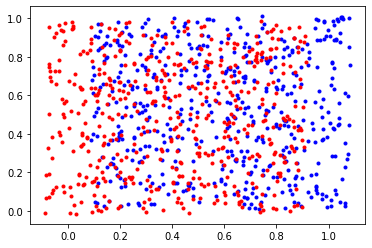

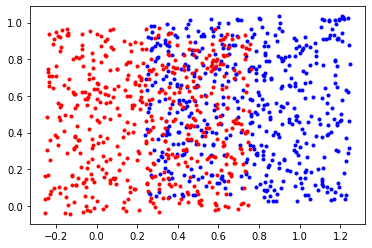

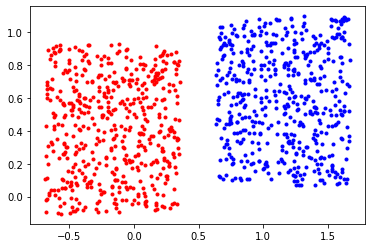

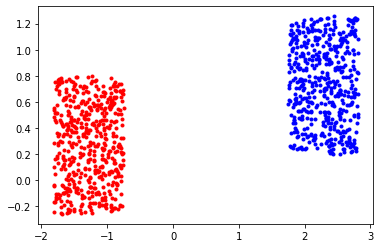

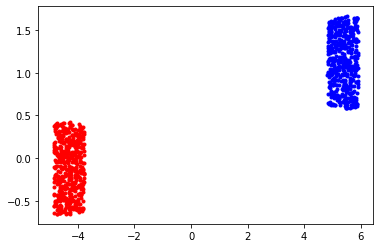

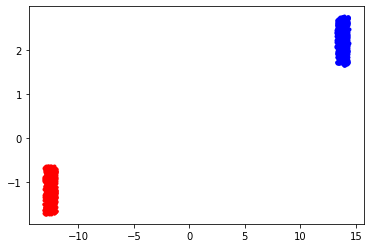

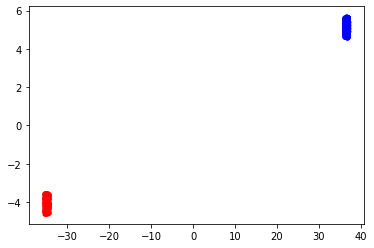

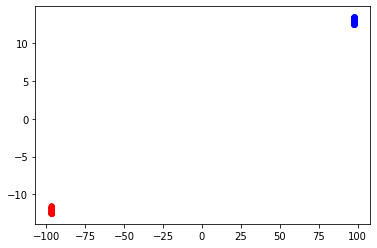

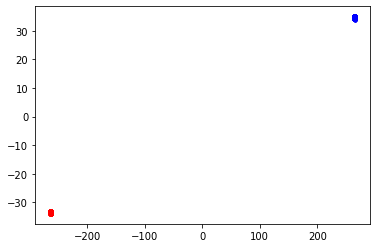

In [ ]:
N = 1000
data = torch.rand(N,2)
label = torch.ones(N)
label[:N//2] = -1
label = label[torch.randperm(N)]

plt.figure()
plt.plot(data[label==1, 0], data[label==1,1], "b.")
plt.plot(data[label==-1, 0], data[label==-1,1], "r.")
plt.show()

lr = 1e-3
sigma = 0.1
n_epochs = 10

def kernel(kerneltype,point,data,label,l,sigma):

  if kerneltype == 'gaussian':
    res = torch.exp(-torch.cdist(point.T,data[label==l]).pow_(2)/sigma)
  elif kerneltype == 'poly':
    pass
  else:
    pass

  return res


for epoch in range(n_epochs):
    perm = torch.randperm(N)
    data = data[perm]
    label = label[perm]
    for l, point in zip(label,data):   
        point_resh = point.reshape([2,1])

        first = kernel('gaussian',point_resh,data,label,l,sigma,lr)
        second = kernel('gaussian',point_resh,data,label,-l,sigma,lr)

        data[label==l] += lr*torch.mul((1-first.T),(point-data[label==l]))

        data[label==-l] -= lr*torch.mul((1-second.T),(point-data[label==-l]))
        

    if epoch % 1 == 0:
      plt.figure()
      plt.plot(data[label==1, 0], data[label==1,1], "b.")
      plt.plot(data[label==-1, 0], data[label==-1,1], "r.")
      plt.show()



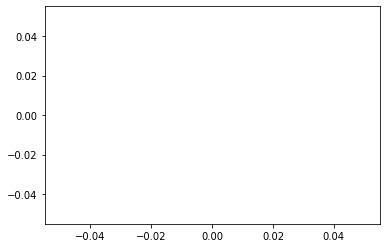

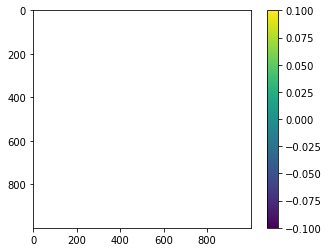

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
0


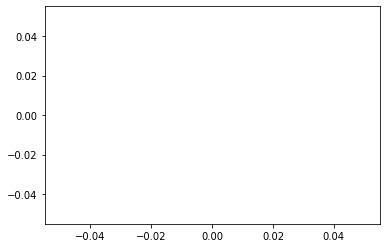

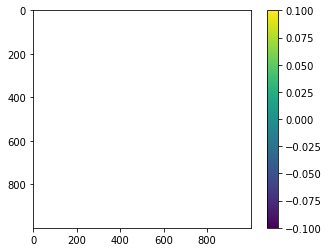

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
500


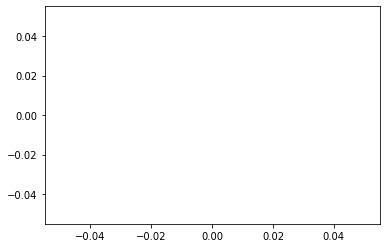

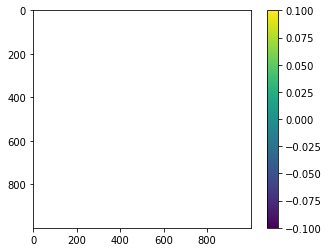

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
1000


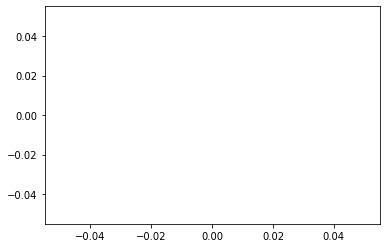

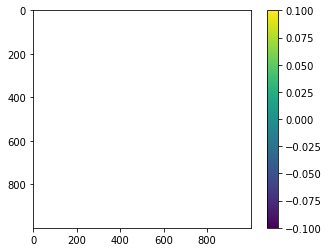

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
1500


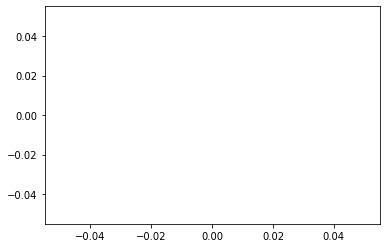

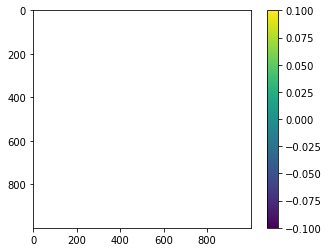

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
2000


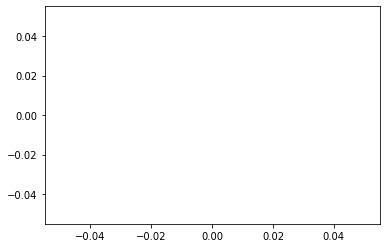

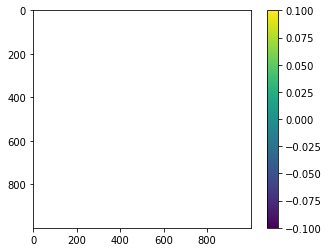

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
2500


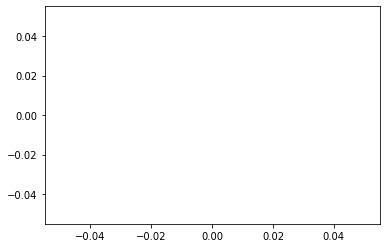

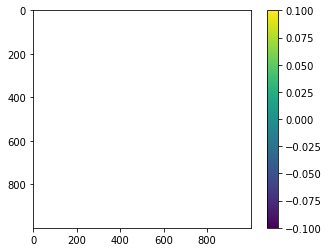

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
3000


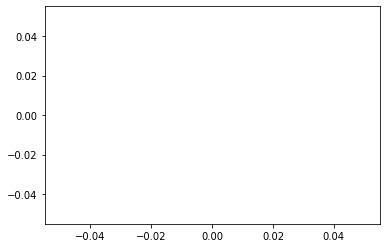

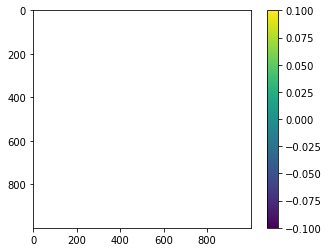

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
3500


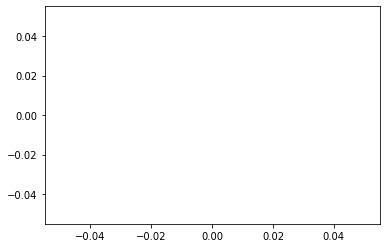

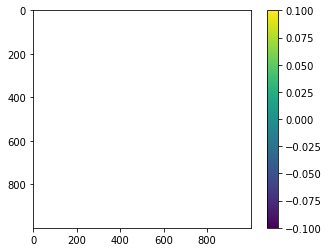

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
4000


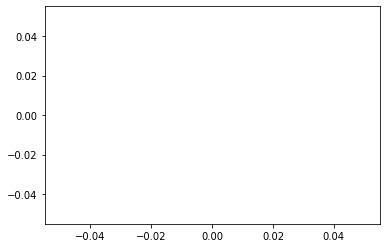

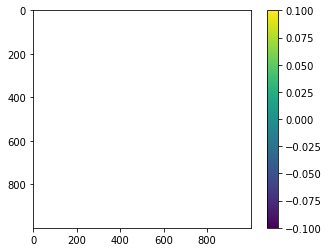

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
4500


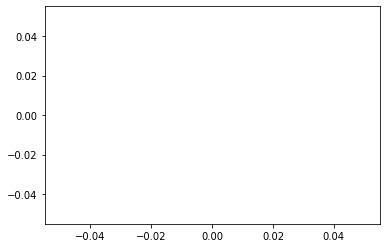

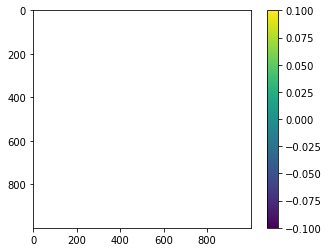

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
5000


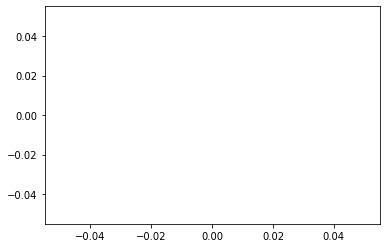

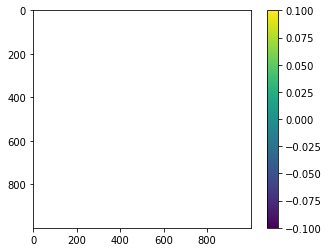

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
5500


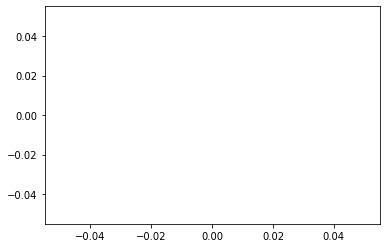

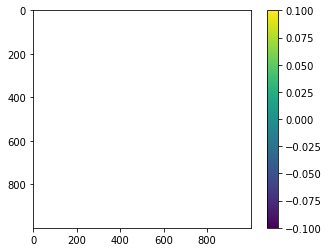

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
6000


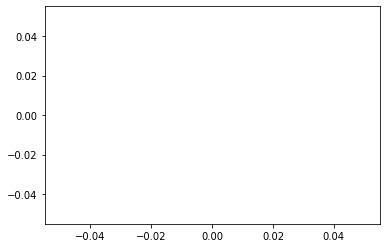

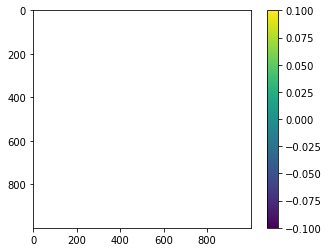

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
6500


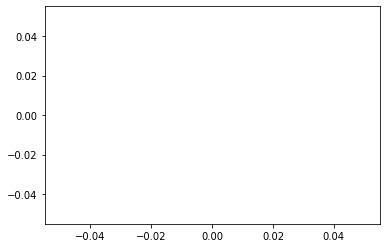

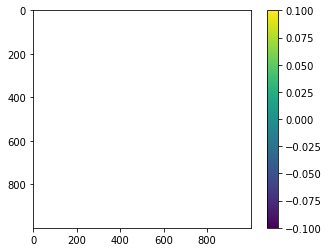

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
7000


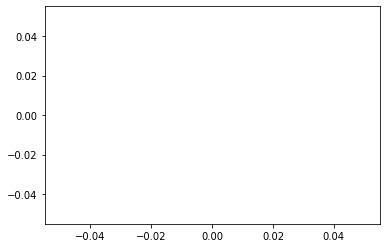

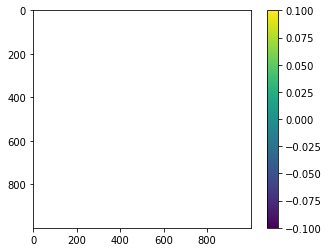

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
7500


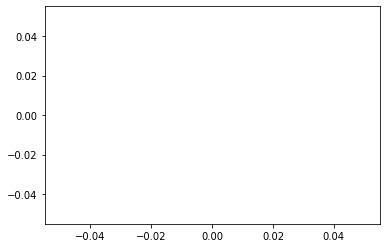

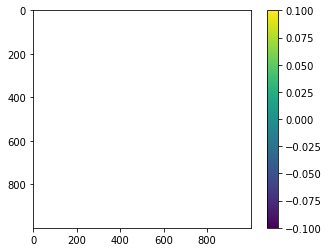

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
8000


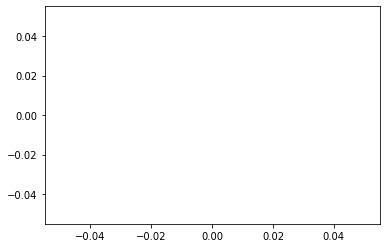

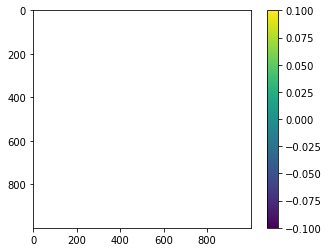

tensor(nan, device='cuda:0', grad_fn=<DivBackward1>)
8500


KeyboardInterrupt: ignored

In [26]:
class Punkte(nn.Module):
  def __init__(self,n=1000,d=2,n_label=4,type='gauss', lambdaa = 1e-1):
    super().__init__()
    # Die Punkte
    self.data = nn.Parameter(torch.rand(n,d)*2 - 1,requires_grad=True)
    self.orig_data = self.data.clone() 
    # Die Label
    self.label = torch.outer(torch.arange(n_label),torch.ones(n//n_label)).flatten()
    # Farben fürs Plotten
    self.colors = colors = ['r','b','y','g','c','m','k','orange','brown','yellow']
    self.mlp_out = 12
    self.mlp_in = d


    self.projection_head = nn.Sequential(
            nn.Linear(self.mlp_in, self.mlp_out, bias=False),
            nn.BatchNorm1d(self.mlp_out),
            nn.LeakyReLU(0.1),
           nn.Linear(self.mlp_out, self.mlp_out, bias=False),
        )
    
    # Parameter
    self.sigma = 2
    
    self.n_label = n_label
    self.type = type

    # Die Label-Matrix
    if self.type == 'poly':
     self.ones = torch.ones(n_label,n//n_label,n//n_label)
    elif self.type == 'gauss' or self.type == 'mlp':
      self.ones = torch.ones(n_label,n//n_label,n//n_label)
    

    #self.ones = (2**self.sigma)*torch.ones(n_label,n//n_label,n//n_label) if self.type == 'poly' else torch.ones(n_label,n//n_label,n//n_label)
    self.label_matrix = torch.block_diag(*self.ones)
    self.lambda_matrix = self.label_matrix.clone()
    self.lambda_matrix[self.label_matrix == 0] = lambdaa

  def forward(self):
    if self.type == 'gauss':
      res = torch.exp(-torch.cdist(self.data,self.data,p=2)**2/self.sigma)
    elif self.type == 'poly':
      a_norm = self.data / (self.data.norm(dim=1)[:, None] + 1e-8)
      res = torch.mm(a_norm, a_norm.T)
      res = res.add_(1).pow_(self.sigma).mul_(2**-self.sigma)
    elif self.type == 'mlp':
      a_norm = self.projection_head(self.data)
      a_norm = a_norm / (a_norm.norm(dim=1)[:, None] + 1e-8)
      res = torch.mm(a_norm, a_norm.T)
    elif self.type == 'tanh':
      """
      daten = torch.linspace(-3, 1, steps=100, requires_grad=True)
      plt.figure()
      #plt.plot(daten.detach().cpu().numpy(),daten.detach().cpu().numpy())
      a = torch.randn(5, requires_grad=True)
      b = torch.ones(5, requires_grad=True)
      y = a * b
      print(y)
      res, gradient = GradKernel.apply(daten)
      plt.plot(daten.detach().cpu().numpy(),res.detach().cpu().numpy())
      plt.plot(gradient,res.detach().cpu().numpy())
      plt.show()

      fgtr
      """
    return res 





  def plot(self):
    plt.figure()
    for index in range(self.n_label):
      if self.type == 'gauss' or self.type == 'tanh':
        plt.scatter(model.data[model.label==index, 0].detach().cpu().numpy(), model.data[model.label==index,1].detach().cpu().numpy(),c=self.colors[index])
      elif self.type == 'poly' or self.type == 'mlp':
        x = self.data/torch.linalg.norm(self.data)
        plt.scatter(x[model.label==index, 0].detach().cpu().numpy(), x[model.label==index,1].detach().cpu().numpy(),c=self.colors[index])

    plt.show()
    plt.figure()
    plt.imshow(self.forward().detach().cpu().numpy())
    plt.colorbar()
    plt.show()



    


device = "cuda" if torch.cuda.is_available() else "cpu"

type = 'mlp'

n_epochs = 10000
model = Punkte(n=1000,d=2,n_label=10,type=type, lambdaa=1/4).to(device)
M_loss = nn.MSELoss()
C_loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)




for epoch in range(n_epochs):
  optimizer.zero_grad()
  output = model()
  
  output = output * model.lambda_matrix.to(device)



  loss = C_loss(torch.log(output.to(device).add_(1e-3)),model.label_matrix.to(device))
  #loss = M_loss(output.to(device),model.label_matrix.to(device))

  loss.backward()
  optimizer.step()
  if epoch % 500 == 0:
    model.plot()
    
    print(loss)
    print(epoch)
  if epoch == n_epochs - 1:
    print(model())

    





In [ ]:
torch.min(model())

tensor(0., device='cuda:0', grad_fn=<MinBackward1>)

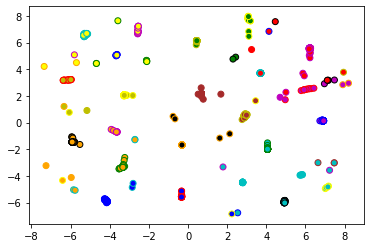

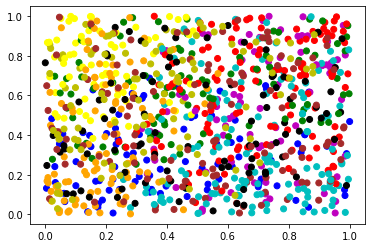

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(model.data.detach().cpu().numpy())
colors = ['r','b','y','g','c','m','k','orange','brown','yellow']
plt.figure()
plt.scatter(model.data[:,0].detach().cpu().numpy(),model.data[:,1].detach().cpu().numpy(), c=[colors[l] for l in kmeans.labels_],edgecolors=[colors[int(l)] for l in model.label])
plt.show()

plt.figure()
plt.scatter(model.orig_data[:,0].detach().cpu().numpy(),model.orig_data[:,1].detach().cpu().numpy(), c=[colors[l] for l in kmeans.labels_])
plt.show()

In [ ]:
class GradKernel(torch.autograd.Function):
    @staticmethod
    def forward(ctx, a, b):      
        y = a * b
        ctx.save_for_backward(a,b,y)
        return y

    @staticmethod
    def backward(ctx, grad_out):
        a, b, y = ctx.saved_tensors

        return a, b


a = torch.randn(5, requires_grad=True)
b = torch.ones(5, requires_grad=True)
x = GradKernel.apply(a,b)
torch.sum(x).backward()
print(a.grad,b.grad)
"""
y = a * b
y.backward(torch.ones(5))

print(y)
"""

tensor([ 0.7464,  0.2627, -2.0903, -1.6487,  0.8506]) tensor([1., 1., 1., 1., 1.])


'\ny = a * b\ny.backward(torch.ones(5))\n\nprint(y)\n'

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.6239, 0.6926, 0.7589, 0.8208,
        0.8761, 0.9231, 0.9600, 0.9854, 0.9984, 0.9984, 0.9854, 0.9600, 0.9231,
        0.8761, 0.8208, 0.7589, 0.6926, 0.6239, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


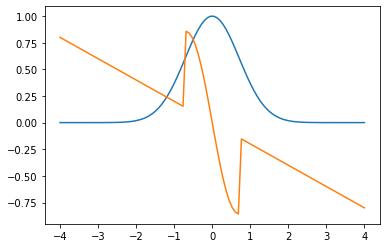

In [ ]:
class FancyE(torch.autograd.Function):
    @staticmethod
    def forward(ctx, a):      
        y = torch.exp(a)
        ctx.save_for_backward(y, a)
        return y

    @staticmethod
    def backward(ctx, grad_out):
        y, a = ctx.saved_tensors

        output = torch.zeros_like(y)
        output[a > -0.5] = y[a > -0.5] * grad_out[a > -0.5] 
        output[a <= -0.5] = 1e-1
        print(output)
        return output

x_1 = torch.linspace(-4,4,100, requires_grad=True)
x_2 = -x_1**2
y = FancyE.apply(x_2)
torch.sum(y).backward()
plt.figure()
plt.plot(x_1.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.plot(x_1.detach().cpu().numpy(), x_1.grad.detach().cpu().numpy())
plt.show()


